## CSVファイル
高松の気象データは、先頭行に更新日時が記録されていて３〜５行目にヘッダー（見出し）があります。<br>
ヘッダー行以降は、通常のCSVデータとして扱えます。<br>
各項目の定義はページ末の気象庁WebサイトURLで確認できます。

In [1]:
with open('data/takamatsu2017.csv', encoding='utf_8') as f:
    lines = f.readlines()
    for i in range(10):
        print(lines[i], end="")

ダウンロードした時刻：2022/05/28 08:18:33

,高松,高松,高松,高松,高松,高松,高松,高松,高松,高松,高松,高松,高松
年月日時,気温(℃),気温(℃),気温(℃),日照時間(時間),日照時間(時間),日照時間(時間),日照時間(時間),日射量(MJ/㎡),日射量(MJ/㎡),日射量(MJ/㎡),相対湿度(％),相対湿度(％),相対湿度(％)
,,品質情報,均質番号,,現象なし情報,品質情報,均質番号,,品質情報,均質番号,,品質情報,均質番号
2017/1/1 1:00:00,5.1,8,1,0,1,8,1,0,8,1,79,8,1
2017/1/1 2:00:00,5.5,8,1,0,1,8,1,0,8,1,77,8,1
2017/1/1 3:00:00,6.0,8,1,0,1,8,1,0,8,1,74,8,1
2017/1/1 4:00:00,6.5,8,1,0,1,8,1,0,8,1,70,8,1
2017/1/1 5:00:00,6.4,8,1,0,1,8,1,0,8,1,70,8,1


## pandasでCSV読み込み
１つのCSVには１年分のデータが格納されています。pd.read_csvメソッドを使ってデータを読込みます。<br>
列名は日本語に類似した英語名にして指定しています。

In [2]:
import pandas as pd

# 単年の気象データを読み込み
tmp = pd.read_csv(
    # CSVファイル名
    'data/takamatsu2017.csv',
    # 先頭５行を読み飛ばし、列名はpandasで指定
    skiprows=5,
    # 列名指定
    names=['DATETIME', 'temperature', 'temperature2', 'temperature3', 
           'sunhour1','sunhour2','sunhour3','sunhour4',
           'insolation','insolation2','insolation3',
           'humid','humid2','humid3'],
    # DATE列とTIME列を合わせてdata_hourという名前で時刻として取り扱うことを指定
    parse_dates={'date_hour': ["DATETIME"]},
    # data_hourをインデックス指定
    index_col = "date_hour",
    #na_values="×"
)

tmp

,temperature,temperature2,temperature3,sunhour1,sunhour2,sunhour3,sunhour4,insolation,insolation2,insolation3,humid,humid2,humid3
date_hour,,,,,,,,,,,,,
2017-01-01 01:00:00,5.1,8,1,0.0,1.0,8,1,0.0,8,1,79.0,8,1
2017-01-01 02:00:00,5.5,8,1,0.0,1.0,8,1,0.0,8,1,77.0,8,1
2017-01-01 03:00:00,6.0,8,1,0.0,1.0,8,1,0.0,8,1,74.0,8,1
2017-01-01 04:00:00,6.5,8,1,0.0,1.0,8,1,0.0,8,1,70.0,8,1
2017-01-01 05:00:00,6.4,8,1,0.0,1.0,8,1,0.0,8,1,70.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 20:00:00,7.3,8,1,0.0,1.0,8,1,0.0,8,1,51.0,8,1
2017-12-31 21:00:00,7.6,8,1,0.0,1.0,8,1,0.0,8,1,51.0,8,1
2017-12-31 22:00:00,7.4,8,1,0.0,1.0,8,1,0.0,8,1,47.0,8,1


## データの可視化
気象データから電力消費量に関係が深い気温データを可視化します。縦軸を気温、横軸を時間に<br>
したグラフを作成します。横軸の時間の単位は電力消費量の場合と同じです。<br>
このグラフから、１年（３６５日)周期で気温が変化していることが確認できます。

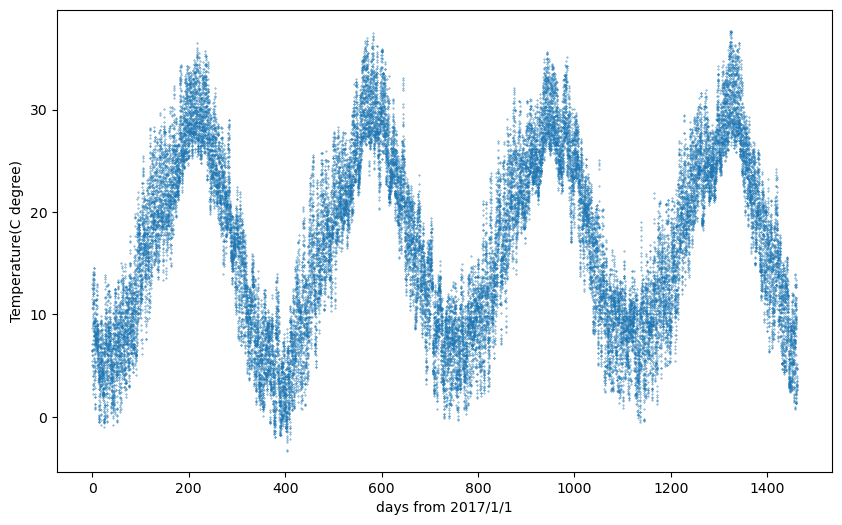

In [3]:
# coding: utf-8
import pandas as pd

years = [2017, 2018, 2019, 2020]

# 複数年の気象データを読み込み
tp = [pd.read_csv(
    './data/takamatsu{:d}.csv'.format(year),
    skiprows=5,
    names=['DATETIME', 'temperature', 'temperature2', 'temperature3', 
           'sunhour1','sunhour2','sunhour3','sunhour4',
           'insolation','insolation2','insolation3',
           'humid','humid2','humid3'],
    parse_dates={'date_hour': ["DATETIME"]},
    index_col='date_hour')
    for year in years
]

tmp = pd.concat(tp)

# -- 可視化 --
import matplotlib.pyplot as plt

# 画像のサイズを設定する
plt.figure(figsize=(10, 6))

# 時系列グラフ生成
delta = tmp.index - pd.to_datetime(str(years[0]) + '/01/01 00:00:00')
tmp['time'] = delta.days + delta.seconds / 3600.0 / 24.0

plt.scatter(tmp['time'], tmp['temperature'], s=0.1)
plt.xlabel('days from ' + str(years[0]) + '/1/1')
plt.ylabel('Temperature(C degree)')

# グラフ保存
#plt.savefig('temperature-graph.png')
plt.show()


In [4]:
tmp[-10:]

,temperature,temperature2,temperature3,sunhour1,sunhour2,sunhour3,sunhour4,insolation,insolation2,insolation3,humid,humid2,humid3,time
date_hour,,,,,,,,,,,,,,
2020-12-31 15:00:00,5.2,8,1,0.7,0.0,8,1,1.27,8,1,42.0,8,1,1460.625000
2020-12-31 16:00:00,4.8,8,1,0.6,0.0,8,1,0.60,8,1,45.0,8,1,1460.666667
2020-12-31 17:00:00,3.8,8,1,0.3,0.0,8,1,0.23,8,1,46.0,8,1,1460.708333
2020-12-31 18:00:00,3.1,8,1,0.0,0.0,8,1,0.00,8,1,55.0,8,1,1460.750000
2020-12-31 19:00:00,2.9,8,1,0.0,1.0,8,1,0.00,8,1,55.0,8,1,1460.791667
2020-12-31 20:00:00,2.7,8,1,0.0,1.0,8,1,0.00,8,1,55.0,8,1,1460.833333
2020-12-31 21:00:00,2.6,8,1,0.0,1.0,8,1,0.00,8,1,55.0,8,1,1460.875000
2020-12-31 22:00:00,3.0,8,1,0.0,1.0,8,1,0.00,8,1,53.0,8,1,1460.916667
2020-12-31 23:00:00,3.2,8,1,0.0,1.0,8,1,0.00,8,1,53.0,8,1,1460.958333


## 気象庁 過去の気象データ・ダウンロード
https://www.data.jma.go.jp/gmd/risk/obsdl/index.php

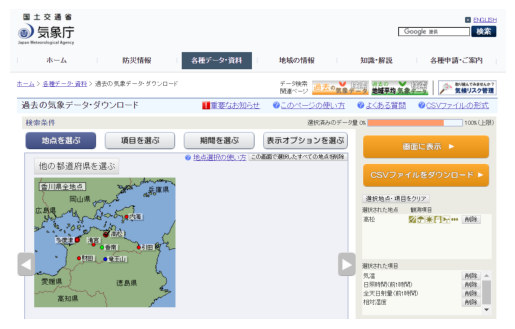

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("data/気象庁web.png")
plt.axis("off")
plt.imshow(img)
plt.show()